In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import time, datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data=pd.read_csv('./Ordinal_Encoding.csv')

In [3]:
data.drop(['price_unskewed_sqrt','price_unskewed','price_unskewed_boxcox'], axis=1, inplace=True)
#keep the original price because in xgboost it doesn't matter

In [4]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'dest_city_id', 'departure_hour_sin', 'departure_hour_cos',
       'arrival_hour_sin', 'arrival_hour_cos'],
      dtype='object')

In [32]:
# X = data.values[:,0:-1]
X = data.drop(columns=['price']).values
y = data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the XGBoost regressor
# xg_reg = xgb.XGBRegressor(random_state=0)
xg_reg = xgb.XGBRegressor(random_state=0, n_estimators=500,learning_rate=0.2,max_depth=10)
xg_reg.fit(X_train,y_train)
# Define the grid of hyperparameters to search
# param_grid = {
#     'learning_rate': [0.05,0.1,0.2],
#     'max_depth': [3,5,10],
#     'n_estimators': [300,400,500]
# }
# xg_reg.fit(X_train,y_train)
# y_pred_xg = xg_reg.predict(X_test)
# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=2, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# Best parameters found:
# {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500}
# Mean Squared Error: 0.00017362399428202306 ### using price_unskewed_boxcox


# # Get the best model
# best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_xg = xg_reg.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred_xg)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)


Mean Squared Error: 2066.249190090695


In [34]:
y_pred_train = xg_reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print("Mean Squared Error:", rmse_train)

Mean Squared Error: 876.0809448865056


In [36]:
results_pred = y_pred_xg #= inv_boxcox(y_pred_xg,_)
results_test = y_test #= inv_boxcox(y_test,_) 

# target_range = np.max(results_pred) - np.min(results_pred)
#percentage_accuracy = (1.0 - (rmse / target_range)) * 100
percentage_accuracy_2 = (1.0 -(rmse / len(results_pred))) * 100
percentage_accuracy_2

96.55625134984885

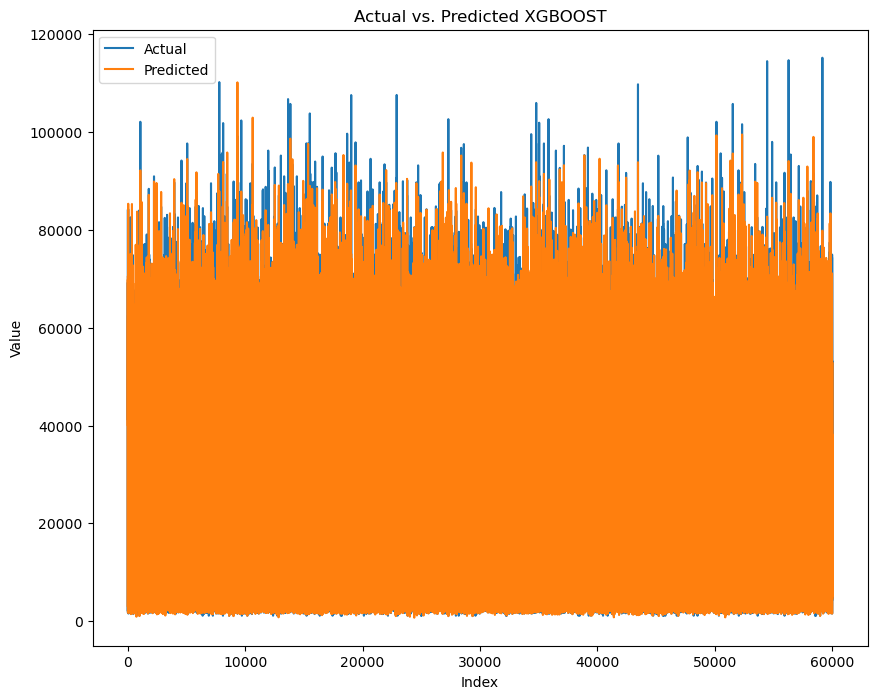

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(results_test, label='Actual')
plt.plot(results_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted XGBOOST')
plt.legend()
plt.show()

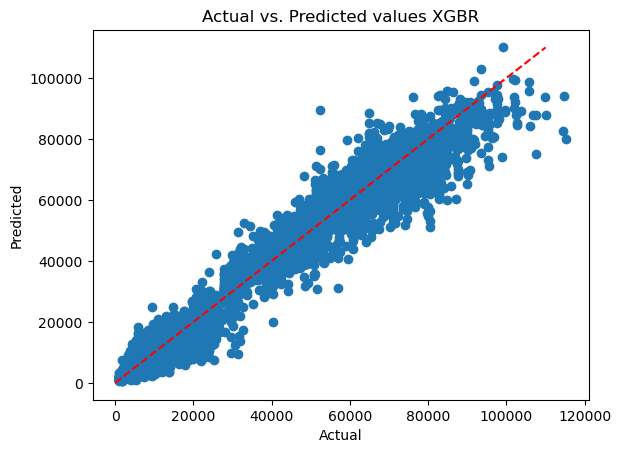

In [42]:
# Scatter plot of actual vs. predicted values
plt.scatter(results_test, results_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted values XGBR")

# Plot the line x = y
x_values = range(110001)
# Plot the line y = x
plt.plot(x_values, x_values, color='red',linestyle='--' ,label='y = x')
plt.show()


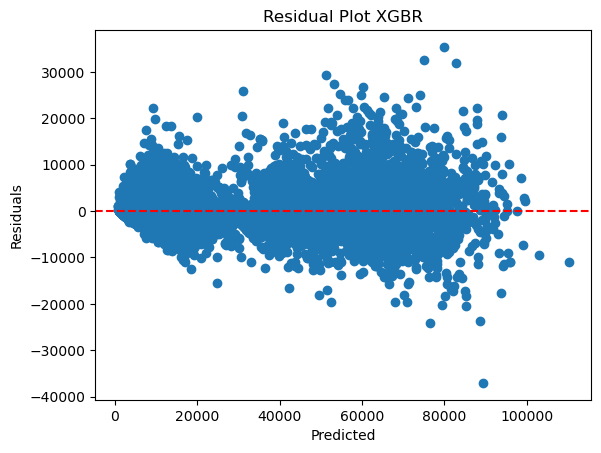

In [41]:
# Residual plot
residuals = results_test - results_pred
plt.scatter(results_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot XGBR")
plt.show()

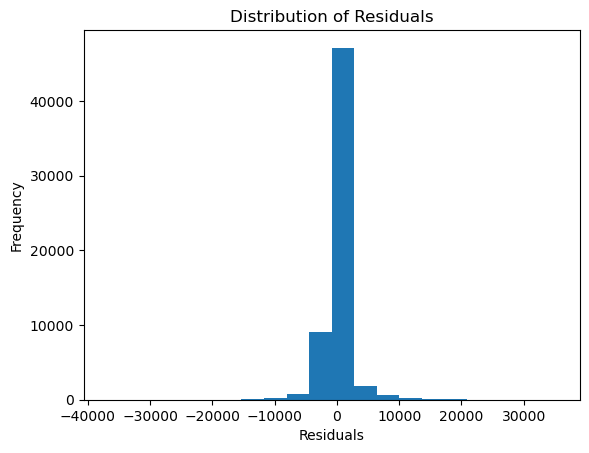

In [40]:
# Distribution of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()